# Ejercicio 1

In [1]:
%%time
import os
import pandas as pd
import pandas_profiling

from ml_tps.utils.data_processing import get_test_train_X_y, scale_dataset
from ml_tps.algorithms.logistic_regression import LogisticRegression
from ml_tps.utils.evaluation import getConfusionMatrix, computeAccuracy
from ml_tps.algorithms.k_nearest_neighbors import KNN
from ml_tps.algorithms.k_means import KMeans

print("Dependencias importadas con éxito.")

Dependencias importadas con éxito.
CPU times: user 1.22 s, sys: 466 ms, total: 1.69 s
Wall time: 1.05 s


In [2]:
%%time
dir_path = os.path.dirname(os.path.realpath("e1.ipynb"))
filepath = f"{dir_path}/../tp3/data/acath.xls"
data = pd.read_excel(filepath)

data.profile_report()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
CPU times: user 10.8 s, sys: 1.84 s, total: 12.6 s
Wall time: 9.91 s


In [3]:
%%time
objective = "sigdz"
train_pctg = 0.6

data = data.drop("tvdlm", axis=1)
data = data.dropna()

data = scale_dataset(data, scaling_type="minmax", objective=objective)
data_incl_sex = data
data = data.drop("sex", axis=1)
X_train, y_train, X_test, y_test = get_test_train_X_y(data, objective, train_pctg)

print("Datos limpiados y procesados.")

Datos limpiados y procesados.
CPU times: user 424 ms, sys: 3.77 ms, total: 427 ms
Wall time: 426 ms


## b) Regresión logística

In [4]:
%%time
logMod = LogisticRegression()
logMod.fit(X_train, y_train, plot_cost_vs_iterations=True)
predictions = logMod.predict(X_test)
parameters = logMod.theta
accuracy = computeAccuracy(predictions, y_test)
conf_matrix_logMod = getConfusionMatrix(predictions=predictions, actual=y_test)
logMod.plot(X_test, predictions)

print("\n\nPrecisión regresión logística (sin género):", accuracy)
print("\nParámetros regresión logística (sin género):\n", logMod.theta, "\n\n")
conf_matrix_logMod

## c) Probabilidad del paciente

In [6]:
%%time
cholesterol = 199
edad = 60
duracion = 2
persona = scale_dataset(pd.DataFrame([cholesterol, edad, duracion]).T, scaling_type="minmax")
probabilidad = logMod.predict(persona, return_as_probabilities=True)[0] * 100

print("Probabilidad de que tenga estrechamiento arterial:", probabilidad.astype(int), "%")

## d) Regresión logística (con género)

In [5]:
%%time
X_train2, y_train2, X_test2, y_test2 = get_test_train_X_y(data_incl_sex, objective, train_pctg)
logMod2 = LogisticRegression()
logMod2.fit(X_train2, y_train2, plot_cost_vs_iterations=True)
predictions2 = logMod2.predict(X_test2)
conf_matrix_logMod2 = getConfusionMatrix(predictions=predictions2, actual=y_test2)
accuracy2 = computeAccuracy(predictions2, y_test2)
logMod2.plot(X_test2, predictions2)

print("\n\nPrecisión regresión logística (con género):", accuracy2)
print("\nParámetros regresión logística (con género):\n", logMod2.theta, "\n\n")
conf_matrix_logMod2

## e) KNN

In [19]:
%%time
knn = KNN()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(examples=X_test, k=5)
conf_matrix_knn = getConfusionMatrix(predictions_knn, y_test)
accuracy_knn = computeAccuracy(predictions_knn, y_test)
knn.plot(X_test, predictions_knn)

print("Precisión KNN:", accuracy_knn, "\n\n")
conf_matrix_knn

## f) K-medias

Centroids stable. Clustering finished.
Finished after 16 iterations.
Converged with error (cost) = 0.320791255891602.


Precisión K-medias: 0.5663716814159292 


CPU times: user 45.5 s, sys: 200 ms, total: 45.7 s
Wall time: 45.3 s


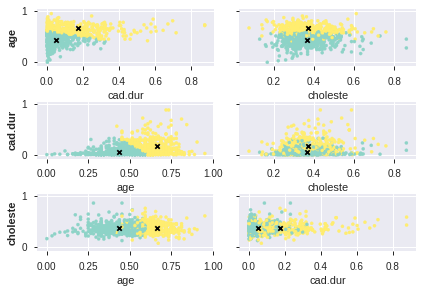

Actual,0.0,1.0
Predicted,,
0.0,218,309
1.0,83,294


In [15]:
%%time
kmeans = KMeans()
kmeans.fit(X_train, k=2)
predictions_kmeans = kmeans.predict(X_test)
conf_matrix_kmeans = getConfusionMatrix(predictions_kmeans, y_test)
accuracy_kmeans = computeAccuracy(predictions_kmeans, y_test)   # possibly real accuracy is (1 - accuracy_kmeans) (we don't know which cluster is which)
kmeans.plot(X_test, predictions_kmeans)

print("\n\nPrecisión K-medias:", accuracy_kmeans, "\n\n")
conf_matrix_kmeans

In [ ]:
from ml_tps.algorithms.kohonen_net import KohonenNet
kohonenNet = KohonenNet()
kohonenNet.fit(X_train, side=3)
predictions_koho = kohonenNet.predict(X_test)

print(predictions_koho)